# 

Câu 1: (2 điểm)Xét hàm số $f(x)=(x-2)^{4}+0.5(x+1)^{2}$. Viết đạo hàm bậc nhất, bậc hai và chạy Newton từ nhiều điểm khởi tạo. Vẽ đồ thị ID kèm các điểm lặp. 

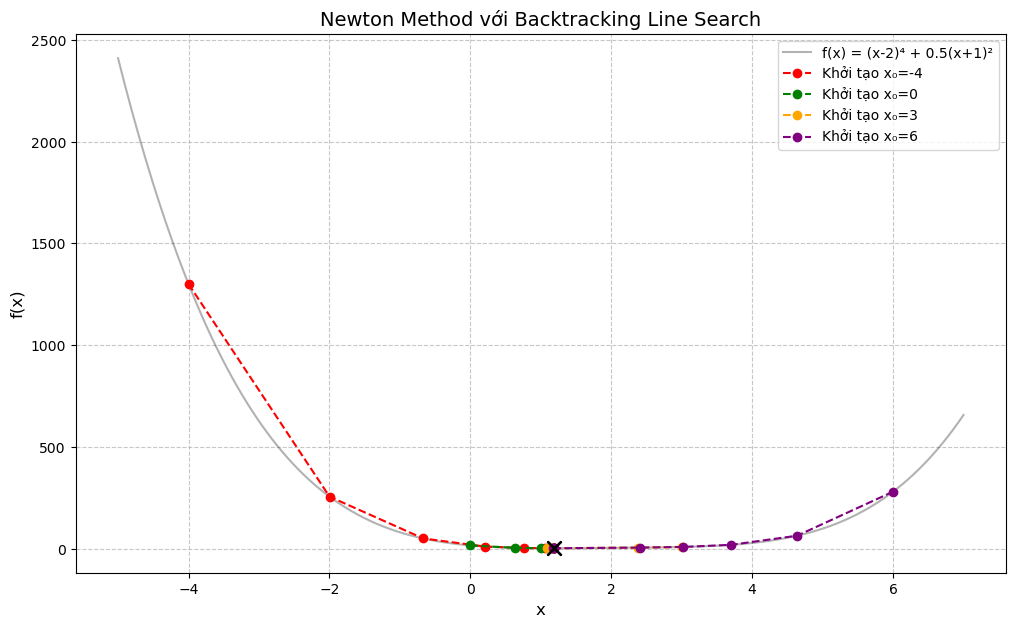

------------------------------------------------------------
   x0 |         x* |      f(x*) |  Số bước lặp
------------------------------------------------------------
 -4.0 |   1.182817 |   2.828286 |            9
  0.0 |   1.182817 |   2.828286 |            6
  3.0 |   1.182817 |   2.828286 |            6
  6.0 |   1.182817 |   2.828286 |            8


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Định nghĩa hàm số và các đạo hàm
def f(x):
    return (x - 2)**4 + 0.5*(x + 1)**2

def f_prime(x):
    return 4*(x - 2)**3 + (x + 1)

def f_double_prime(x):
    return 12*(x - 2)**2 + 1

# 2. Thuật toán Newton kết hợp Backtracking Line Search
def newton_with_backtracking(x0, tol=1e-6, max_iter=100, alpha=1.0, beta=0.5, c=1e-4):
    """
    alpha: Bước nhảy ban đầu
    beta: Hệ số giảm bước nhảy (0 < beta < 1)
    c: Tham số điều kiện Armijo
    """
    x_values = [x0]
    curr_x = x0
    
    for _ in range(max_iter):
        grad = f_prime(curr_x)
        hessian = f_double_prime(curr_x)
        
        # Hướng tìm kiếm Newton
        delta_x = -grad / hessian
        
        # Backtracking Line Search (Tìm bước nhảy t phù hợp)
        t = alpha
        while f(curr_x + t * delta_x) > f(curr_x) + c * t * grad * delta_x:
            t = beta * t
            
        # Cập nhật x mới
        new_x = curr_x + t * delta_x
        x_values.append(new_x)
        
        # Điều kiện dừng
        if abs(new_x - curr_x) < tol:
            break
        curr_x = new_x
        
    return np.array(x_values)

# 3. Chạy thử nghiệm với các điểm khởi tạo khác nhau
starting_points = [-4, 0, 3, 6]
paths = [newton_with_backtracking(x0) for x0 in starting_points]

# 4. Vẽ đồ thị
x_range = np.linspace(-5, 7, 500)
y_range = f(x_range)

plt.figure(figsize=(12, 7))
plt.plot(x_range, y_range, 'k-', alpha=0.3, label='f(x) = (x-2)⁴ + 0.5(x+1)²')

colors = ['red', 'green', 'orange', 'purple']
for i, (path, c) in enumerate(zip(paths, colors)):
    plt.plot(path, f(path), 'o--', color=c, label=f'Khởi tạo x₀={starting_points[i]}')
    # Đánh dấu điểm cuối cùng (cực tiểu)
    plt.scatter(path[-1], f(path[-1]), color='black', marker='x', s=100, zorder=5)

plt.title('Newton Method với Backtracking Line Search', fontsize=14)
plt.xlabel('x', fontsize=12)
plt.ylabel('f(x)', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# 5. In kết quả hội tụ
print("-" * 60)
print(f"{'x0':>5} | {'x*':>10} | {'f(x*)':>10} | {'Số bước lặp':>12}")
print("-" * 60)
for x0, path in zip(starting_points, paths):
    print(f"{x0:>5.1f} | {path[-1]:>10.6f} | {f(path[-1]):>10.6f} | {len(path)-1:>12}")

Câu 2: (4 điểm) Cho ma trận $$P=\begin{bmatrix}1&0\\ 0&4\end{bmatrix}$$và vector $q=(-1;4).$ Xét bài toán tối ưu sau $$min_{x\in\mathbb{R}^{2}}f(x)=\frac{1}{2}x^{T}Px+q^{T}x+\frac{5}{2}.$$ (1) 
a. (2 điểm) Xác định điểm tối ưu $x^{*}$ và giá trị tối ưu $p^{*}$ của bài toán (1).  

b. (1 điểm) Chuyển bài toán (1) về bài toán least square (bình phương tối thiểu) sau bằng cách chỉ ra ma trận A và vector b. $$min_{x\in\mathbb{R}^{2}}\frac{1}{2}||Ax-b||_{2}^{2}$$(2) Biết rằng A là ma trận đường chéo và vector b có các thành phần là các số thực dương.   
c. (1 điểm) Sử dụng thuật toán Gradient Descent cho bài toán trên (bài toán (1) hoặc (2)), với giá trị x ban đầu là $x^{(0)}=(-1;2)$, sử dụng learning rate lần lượt là 0.4 và 0.6 và thực hiện tối đa 100 vòng lặp. In ra giá trị của $x^{(k)}$, $f(x^{(k)})$ tương ứng sau mỗi vòng lặp k và vẽ đồ thị biểu thị cho sai số $|f(x^{(k)})-p^{*}|$ trong cả hai trường hợp của learning rate. Từ đó hãy đưa ra kết luận về sự hội tụ của thuật toán Gradient Descent trong từng trường hợp của learning rate. 

x* = [ 1. -1.]
Giá trị tối ưu p* = 0.0
least square
A =
 [[1 0]
 [0 2]]
b = [ 1 -2]

Alpha = 0.4: x cuối = [ 1. -1.], f(x cuối) = 0.000000

Alpha = 0.6: x cuối = [1.00000000e+00 1.23005583e+15], f(x cuối) = 3026074673375697913943529881600.000000


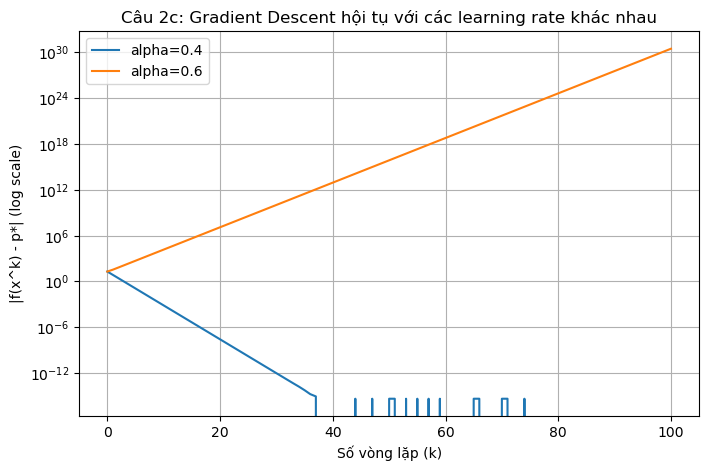


=> Kết luận:
- Với alpha = 0.4 (< 0.5): GD hội tụ.
- Với alpha = 0.6 (> 0.5): GD không hội tụ (dao động).


In [10]:
P = np.array([[1., 0.],
              [0., 4.]])
q = np.array([-1., 4.])

def f2(x):
    return 0.5 * x.dot(P).dot(x) + q.dot(x) + 2.5

def grad_f2(x):
    return P.dot(x) + q

# (a) Tính nghiệm tối ưu
x_star = -np.linalg.inv(P).dot(q)
p_star = f2(x_star)
print("x* =", x_star)
print("Giá trị tối ưu p* =", p_star)

# (b) Dạng least squares
A = np.diag([1, 2])
b = np.array([1, -2])
print("least square")
print("A =\n", A)
print("b =", b)

# (c) Gradient Descent
def gradient_descent(x0, alpha, max_iter=100):
    xs = [x0.copy()]
    fs = [f2(x0)]
    x = x0.copy()
    for k in range(max_iter):
        g = grad_f2(x)
        x = x - alpha * g
        xs.append(x.copy())
        fs.append(f2(x))
    return np.array(xs), np.array(fs)

x0 = np.array([-1., 2.])
alphas = [0.4, 0.6]
results2 = {}
for a in alphas:
    xs, fs = gradient_descent(x0, a, max_iter=100)
    results2[a] = (xs, fs)
    print(f"\nAlpha = {a}: x cuối = {xs[-1]}, f(x cuối) = {fs[-1]:.6f}")

# Vẽ biểu đồ |f(x^k) - p*|
plt.figure(figsize=(8,5))
for a in alphas:
    fs = results2[a][1]
    plt.semilogy(np.arange(len(fs)), np.abs(fs - p_star), label=f'alpha={a}')
plt.xlabel('Số vòng lặp (k)')
plt.ylabel('|f(x^k) - p*| (log scale)')
plt.title('Câu 2c: Gradient Descent hội tụ với các learning rate khác nhau')
plt.legend(); plt.grid(True)
plt.show()

print("\n=> Kết luận:")
print("- Với alpha = 0.4 (< 0.5): GD hội tụ.")
print("- Với alpha = 0.6 (> 0.5): GD không hội tụ (dao động).")

Câu 3: (4 điểm)Cho ma trận $$U=\begin{bmatrix}1&-2\\ 2&-4\end{bmatrix}$$và vector $w=(2;2)$.Xét bài toán tối ưu có điều kiện ràng buộc của bài toán (1) như sau (ma trận P và vector q được cho ở Câu 1) $$min_{x=(x_{1},x_{2})\in\mathbb{R}^{2}}f(x)=\frac{1}{2}x^{T}Px+q^{T}x+\frac{5}{2}.$$34subject to 35$$Ux-w=0$$36  
a. (2 điểm) Gọi $x^{*}$ và $v^{*}$ lần lượt là điểm tối ưu của bài toán trên và bài toán đối ngẫu của nó, viết điều kiện Karush-Kuhn-Tucker (KKT) cho $x^{*}$ và $v^{*}$.  
b. (2 điểm) Tìm một cặp giá trị của $(x^{*},v^{*})$ thoả điều kiện KKT vừa tìm được ở câu b), từ đó đưa ra giá trị tối ưu cho bài toán trên.

In [6]:
U = np.array([[1, -2],
              [2, -4]])
w = np.array([2, 2])

print("\n===== CÂU 3: KIỂM TRA KHẢ THI RÀNG BUỘC =====")
print("Hệ ràng buộc Ux = w là:")
print("x1 - 2x2 = 2")
print("2x1 - 4x2 = 2")

# Kiểm tra tính khả thi (giải hệ)
try:
    x_feasible = np.linalg.solve(U, w)
    print("Tồn tại nghiệm khả thi:", x_feasible)
except np.linalg.LinAlgError:
    print("=> Ma trận U suy biến, kiểm tra tỷ lệ hàng:")

# Kiểm tra tỷ lệ hàng
ratio1 = U[1,0]/U[0,0]
ratio2 = U[1,1]/U[0,1]
rhs_ratio = w[1]/w[0]
print("Tỷ lệ hàng:", ratio1, ratio2, "vế phải =", rhs_ratio)

if not np.isclose(ratio1, ratio2) or not np.isclose(rhs_ratio, ratio1):
    print("=> Ràng buộc KHÔNG KHẢ THI → không tồn tại (x*, v*).")
else:
    print("=> Ràng buộc khả thi, có thể giải hệ KKT.")

print("\nĐiều kiện KKT:")
print("∇f(x) + U^T v = 0")
print("U x = w")

print("\nKết luận Câu 3:")
print("Vì hệ Ux = w vô nghiệm, bài toán KHÔNG có nghiệm khả thi (infeasible).")


===== CÂU 3: KIỂM TRA KHẢ THI RÀNG BUỘC =====
Hệ ràng buộc Ux = w là:
x1 - 2x2 = 2
2x1 - 4x2 = 2
=> Ma trận U suy biến, kiểm tra tỷ lệ hàng:
Tỷ lệ hàng: 2.0 2.0 vế phải = 1.0
=> Ràng buộc KHÔNG KHẢ THI → không tồn tại (x*, v*).

Điều kiện KKT:
∇f(x) + U^T v = 0
U x = w

Kết luận Câu 3:
Vì hệ Ux = w vô nghiệm, bài toán KHÔNG có nghiệm khả thi (infeasible).
